In [26]:
from collections import defaultdict

url = 'http://en.wikipedia.org/wiki/List_of_countries_by_past_and_future_population'
website_html = requests.get(url).text
#print website_html

def get_population_html_tables(html):
    """Parse html and return html tables of wikipedia population data."""
    dom = web.Element(html)
#    tbls = dom('table') #all the tables
    tbls=dom.by_class('sortable wikitable')  #the tables we want
    return tbls

tables = get_population_html_tables(website_html)
print "table length: %d" %len(tables)
for t in tables:
    print t.attributes

def table_type1(tbl): # extract the table type
    return tbl('th')[1].content

def table_type2(tbl): # extract the table type a different way
    headers = [th.content for th in tbl.by_tag('th')]
#    type(headers)
    return headers[1]

print table_type1(tables[0])
print table_type1(tables[1])
print table_type1(tables[2])

tables_by_type1 = defaultdict(list)
for t in tables:
    tables_by_type1[table_type1(t)].append(t)
"""now I have a dictionary with one key and an array of values associated with it"""
    
print tables_by_type1

def get_countries_population(tables):
    """extract population data from each table and store it in dictionary."""
    
    result = defaultdict(dict)

    for tbl in tables:
        headers = tbl('tr')
        first_header = headers[0]
        th_s = first_header('th')
    
        years = [int(val.content) for val in th_s if val.content.isnumeric()]
        year_indices = [idx for idx, val in enumerate(th_s) if val.content.isnumeric()]
        # 2. step: iterate over all tables, extract headings and actual data and combine data into single dict
        rows = tbl('tr')[1:]
        for row in rows:
            tds = row('td')
            country_name = tds[1]('a')[0].content
            population_by_year=[]
            for colidx in year_indices:
                popu=tds[colidx].content.replace(',', '')
                if popu[0] == '<': #check if the item is bold
                    popu = popu[3:-4] #remove the bold tags
                population_by_year.append(int(popu)/1000.0) #convert to units of millions
            subdict = dict(zip(years, population_by_year))
            #print zip(years,population_by_year)
            result[country_name].update(subdict)
    
    return result


result = get_countries_population(tables_by_type1['Country (or dependent territory)'])
#print result

"""convert dictionary to dataframe"""
dataframe=pd.DataFrame.from_dict(result,orient='index')
dataframe.sort_index(axis=1,inplace=True)
dataframe = dataframe.rename(index={"Democratic Republic of the Congo": "DR Congo"})
dataframe

table length: 3
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
{u'style': u'text-align: right', u'class': u'sortable wikitable'}
Country (or dependent territory)
Country (or dependent territory)
Country (or dependent territory)
defaultdict(<type 'list'>, {u'Country (or dependent territory)': [Element(tag=u'table'), Element(tag=u'table'), Element(tag=u'table')]})


1950      1955      1960      1965  \
Afghanistan                      8.151     8.892     9.830    10.998   
Albania                          1.228     1.393     1.624     1.884   
Algeria                          8.893     9.842    10.910    11.964   
American Samoa                   0.020     0.020     0.021     0.025   
Andorra                          0.007     0.007     0.009     0.014   
Angola                           4.118     4.424     4.798     5.135   
Anguilla                         0.006     0.006     0.006     0.006   
Antigua and Barbuda              0.046     0.052     0.055     0.060   
Argentina                       17.151    18.928    20.617    22.284   
Armenia                          1.356     1.566     1.869     2.206   
Aruba                            0.050     0.054     0.058     0.060   
Australia                        8.268     9.278    10.362    11.440   
Austria                          6.936     6.947     7.048     7.271   
Azerbaijan                       2.886     3.314     3.882     4.567   
Bahamas                          0.071     0.088     0.113     0.140   
Bahrain                          0.115     0.131     0.157     0.192   
Bangladesh                      45.646    49.589    54.593    60.285   
Barbados                         0.211     0.228     0.233     0.235   
Belarus                          7.723     7.781     8.168     8.591   
Belgium                          8.640     8.869     9.119     9.449   
Belize                           0.066     0.077     0.092     0.107   
Benin                            1.673     1.847     2.056     2.311   
Bermuda                          0.039     0.042     0.045     0.049   
Bhutan                           0.164     0.187     0.213     0.255   
Bolivia                          2.767     3.075     3.435     3.854   
Bosnia and Herzegovina           2.663     2.975     3.241     3.494   
Botswana                         0.431     0.462     0.497     0.539   
Brazil                          53.444    61.652    71.412    82.602   
British Virgin Islands           0.007     0.007     0.008     0.009   
Brunei                           0.045     0.061     0.084     0.103   
...                                ...       ...       ...       ...   
Taiwan                           7.982     9.486    11.210    12.978   
Tajikistan                       1.531     1.781     2.081     2.511   
Tanzania                         7.935     8.971    10.260    11.871   
Thailand                        20.042    23.452    27.513    32.062   
Timor-Leste                      0.436     0.473     0.509     0.554   
Togo                             1.172     1.299     1.456     1.648   
Tonga                            0.046     0.055     0.064     0.075   
Trinidad and Tobago              0.633     0.721     0.842     0.940   
Tunisia                          3.518     3.847     4.150     4.566   
Turkey                          21.122    24.145    28.218    31.951   
Turkmenistan                     1.205     1.348     1.585     1.883   
Turks and Caicos Islands         0.006     0.006     0.006     0.006   
Tuvalu                           0.005     0.005     0.006     0.006   
Uganda                           5.522     6.318     7.262     8.390   
Ukraine                         36.775    39.369    42.645    45.235   
United Arab Emirates             0.072     0.083     0.104     0.144   
United Kingdom                  50.128    50.947    52.373    54.351   
United States                  151.869   165.070   179.980   193.527   
United States Virgin Islands     0.027     0.028     0.033     0.044   
Uruguay                          2.195     2.354     2.531     2.694   
Uzbekistan                       6.293     7.233     8.532    10.206   
Vanuatu                          0.053     0.059     0.067     0.075   
Venezuela                        5.010     6.171     7.557     9.068   
Vietnam                         25.349    27.739    31.657    37.259   
Wa

In [33]:
import requests
import pattern.web
import pandas as pd

url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
website_html = requests.get(url).text

def get_html_tables(html):
    dom = web.Element(html)
#    tbls = dom('table') # all the tables
    tbls = dom.by_class('wikitable sortable')  # the tables we want
    return tbls

table = get_html_tables(website_html)[0] # [0] to reutrn the first one

In [4]:
def get_countries_GDP(table):
    result = {}
    rows = table('tr') # rows are identified by 'tr' tag
    rows = rows[1:] # ignore headers 
    for row in rows:
        # get the content from each row
        country_name = row('td')[1]('a')[0].content
        GDP = row('td')[2].content.replace(',','')
        result[country_name] = int(GDP) # add to dictionary 
    return result

GDP_dict = get_countries_GDP(table)

In [28]:
dataframe_GDP = pd.DataFrame.from_dict(GDP_dict, orient='index')
# replace dataframe with a version sorted by country name
dataframe_GDP.sort_index(axis=0, inplace=True)
# label the column
dataframe_GDP.columns = ['GDP per capita']
# rename a row label
dataframe_GDP.rename(index={"Democratic Republic of the Congo": "DR Congo"}, inplace=True)

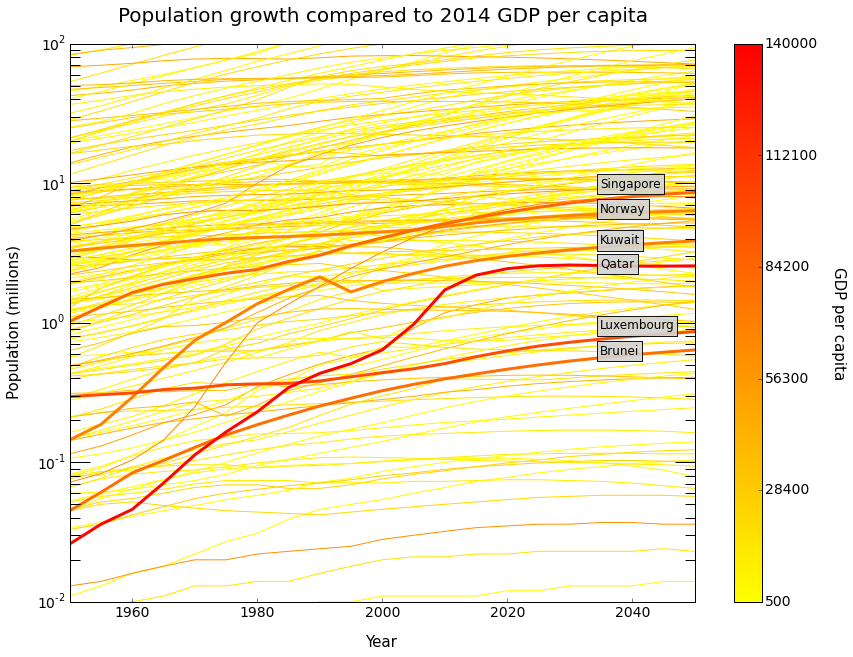

In [34]:
import math as m
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.gridspec

# lists of all coutries that are in both databases and their GDP per capita
all_countries = [country for country in dataframe.index if country in dataframe_GDP.index]
all_GDP = [dataframe_GDP.ix[country][0] for country in all_countries]

def plotpop_all_log(x1,x2,y1,y2,country_list,z,z1,z2,title,label):
    
    plt.figure(figsize=(14,10))

    # a colormap gradient
    my_cmap = mpl.colors.LinearSegmentedColormap.from_list('mycolors',['yellow','red'])
    CS3 = plt.cm.ScalarMappable(cmap=my_cmap, norm=plt.Normalize(vmin=z1, vmax=z2))
    # set up an "array for the scalar mappable" (or else will get errors below) 
    CS3._A = []
    
    box = dict(boxstyle='square', facecolor='lightgrey', alpha=0.9)
    
    i = 0
    lastmark = 10.0
    lastfinal = 10.0
    labeled_countries = []
    labeled_colors = []
    for country in country_list:
        
        row = dataframe.ix[country]
        r = 1
        g = (z2-float(z[i]))/(z2-z1)
        b = 0
        plt.semilogy(row.index, row, label=row.name, color=(r,g,b))
        
        if label == True:
            # mark some countries to be labeled
            if all_GDP[i] > 67000:
                labeled_countries.append(country)
                labeled_colors.append([r,g,b])
        i += 1

    if label == True:
        label_pads = [0, 0.05, 0.1, 0, -0.05, 1.3] # manual shifts for the labels
        yearmark = 2040
        for i, country in enumerate(labeled_countries):
            row = dataframe.ix[country]
            r,g,b = labeled_colors[i]
            plt.semilogy(row.index, row, label=row.name, color=(r,g,b),
                             linewidth=3) # re-plot thicker lines for these
            plt.text(row.index[-4], row[yearmark]+label_pads[i] , row.name,
                         bbox=box, fontsize=12) # (x-position, y-position, label, ...)

    plt.xlim(xmin=x1,xmax=x2)
    plt.ylim(ymin=y1,ymax=y2)
    plt.tick_params(axis='both', labelsize=14)
    # enlarge the y-axis ticks
    plt.tick_params(axis='y', length=20, width=1, which='major')
    plt.tick_params(axis='y', length=10, width=1, which='minor')
    
    plt.xlabel("Year", fontsize=15, labelpad=15)
    plt.ylabel("Population (millions)", fontsize=15, labelpad=15)
    plt.title(title, fontsize=20, y=1.03)

    cbar_ticks = range(z1, z2+(z2-z1)/5, (z2-z1)/5)
    cbar = plt.colorbar(CS3)
    cbar.set_label("GDP per capita", rotation=270, fontsize=15, labelpad=30)
    cbar.set_ticks(cbar_ticks)
    cbar.ax.set_yticklabels([str(a) for a in cbar_ticks])
    cbar.ax.tick_params(labelsize=14)
    
plotpop_all_log(1950, 2050, 0.01, 100, all_countries, all_GDP,
                    int(min(all_GDP)/100)*100-100,
                    int(m.ceil(max(all_GDP)/10000)*10000)+10000,
                    "Population growth compared to 2014 GDP per capita",True)

plt.savefig("popgrowthGDPall.png", bbox_inches="tight", dpi=144)